In [136]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 실습과제 1 : 분석 계획 실습

## 1. 분석 구분별 간단한 분석 시나리오 및 가설 정의
+ 혈당 산소 요구량(OXY)는 남자가 여자보다 높을 것이다.
+ 혈당 산소 요구량(OXY)는 나이가 적을 수록 높을 것이다.

## 2. 시나리오 및 가설 별 분석 기법 매핑

|목적|분석방법|주요내용|
|:------|:---|:---|
|전체 데이터의 분포 특성 및 변수 간의 관련성을 확인|막대 그래프 분석|연속형 변수를 대상으로 데이터의 전체 분포를 확인|
|       |Box Plot 분석|범주형 변수의 범주별로 데이터의 분포를 확인하여 목표변수의 영향도를 확인|
|       |산점도 분석|전체 변수 간의 영향도를 사전에 확인|
|영향 인자 확인|선형회귀분석|전통적인 통계기법을 바탕으로 영향을 주는 설명변수를 확인|
|             |Box Plot 분석|이상치를 확인하여 처리|
|전체적인 데이터의 층별화 특성을 확인|군집분석|전체의 데이터를 층별화하여 특성을 확인|
|데이터 모델링을 통한 시사점 도출|SVM|이산형 목표변수를 잘 분류할 수 있는 모델 개발|

## 3. 분석 계획의 타당성 검토
+ 성별 간의 OXY의 상관관계를 어떠한 plot을 사용하여 분석한 결과 남자의 OXY가 높았다.
+ 이를 ML 알고리즘을 통해 Test data를 이용하여 분석한 결과, 정확도가 높게 측정되었다. 

# 실습과제 2: Titanic 생존 분석

In [12]:
# 한글 폰트 설정
# !ls -l /usr/share/fonts/truetype/
!rm -rf ~/.cache/matplotlib/*
!fc-cache -fv

import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

/usr/share/fonts: caching, new cache contents: 0 fonts, 6 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/X11/Type1: caching, new cache contents: 8 fonts, 0 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan2: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-korea1: c

fc-cache: succeeded


['NanumGothic',
 'NanumMyeongjo Eco',
 'NanumSquareRound',
 'Nanum Pen Script',
 'NanumGothic',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumGothic Eco',
 'NanumBarunGothic',
 'NanumSquare',
 'Nanum Brush Script',
 'NanumGothic',
 'NanumBarunpen',
 'NanumGothicCoding',
 'NanumMyeongjo Eco',
 'NanumSquareRound',
 'NanumGothic Eco',
 'NanumGothicCoding',
 'NanumMyeongjo Eco',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic Eco',
 'NanumSquare',
 'NanumGothic',
 'NanumSquare',
 'NanumBarunpen',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumMyeongjo Eco',
 'NanumSquareRound',
 'NanumGothic',
 'Nanum Pen Script',
 'NanumBarunGothic',
 'NanumBarunpen',
 'NanumMyeongjo Eco',
 'NanumBarunGothic',
 'NanumBarunpen',
 'NanumGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumSquareRound',
 'NanumSquare',
 'NanumMyeongjo',
 'NanumMyeongjo Eco',
 'NanumSquare',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'Nanum Brush Scrip

In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 전체 적용
plt.rcParams["font.family"] = 'NanumMyeongjo'

In [80]:
df_titanic = pd.read_csv('/home/piai/Bigdata 실습과제/2. Big Data 분석/titanic.csv', encoding = 'euc-kr')

## 데이터 속성 및 기술 통계량 확인

### 데이터 확인

In [82]:
df_titanic.head()
# Pclass : 승객 등급 1 2 3 등석
# Name Sex Age
# SlibSp : 함께 탑승한 형제, 배우자의 수
# Parch : 함께 탑승한 자녀, 부모의 수
# Ticket : 티켓 아이디
# Fare :요금(파운드)
# Cabin : 객실 번호
# Embarked : 승객이 탑승한 곳
## C(Cherbourg) 
## Q(Queenstown) 
## S(Southampton) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 데이터 전처리 : 필요없는 필드 삭제

In [84]:
df_titanic.drop(["PassengerId","Name","Embarked","Ticket","Cabin"], axis = 1, inplace = True)

In [85]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,30.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


## 변수의 분포 확인

### 목표 변수의 분포

In [111]:
df_survived = df_titanic["Survived"].value_counts()
df_titanic["Survived"].value_counts()

# df_Pclass = df_titanic["Pclass"].value_counts()
# df_Sex = df_titanic["Sex"].value_counts()
# df_Age = df_titanic["Age"].value_counts()
# df_SibSp = df_titanic["SibSp"].value_counts()
# df_Parch = df_titanic["Parch"].value_counts()
# df_Fare = df_titanic["Fare"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

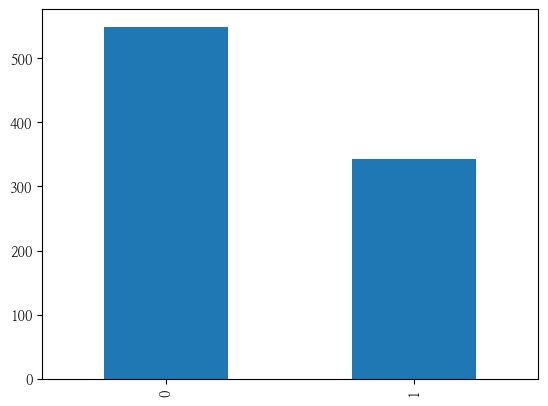

In [102]:
df_survived.plot.bar()

#### 분석결과 : 사망자(549명)가 생존자(342명)보다 많음. 

### Class 변수 분포

+ 선실 등급별 인원 분포

In [113]:
df_titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

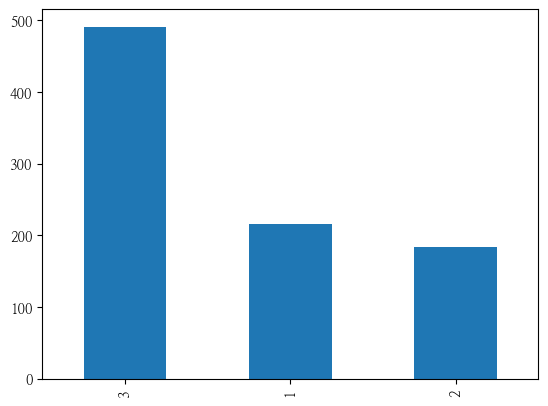

In [106]:
df_Pclass.plot.bar()

+ 분석결과 : 타이타닉에 타고 있던 인원들은 **대부분 3등급의 선실에 탑승하였다.**

## 결측값 및 이상치 처리

### 결측값 제거

In [109]:
df_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

+ 데이터 선별과정에서 결측값이 포함된 변수들은 제거되었음

### 이상치 확인 및 처리

#### Age

<AxesSubplot:>

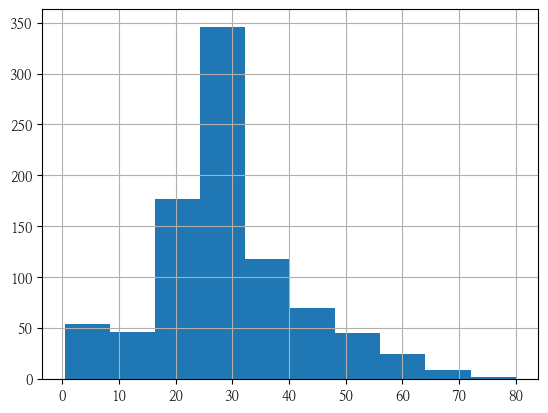

In [120]:
df_titanic["Age"].hist()

+ 확인 결과 : 이상치는 없었으며, **대부분 20대~40대에 분포**하고 있다.

#### 함께 탑승한 형제, 배우자의 수(SibSp)

<AxesSubplot:>

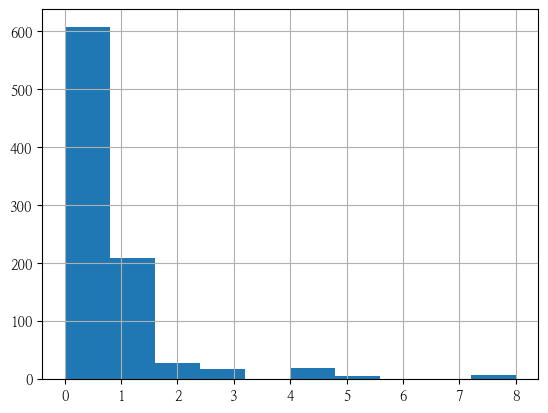

In [125]:
df_titanic["SibSp"].hist()

+ 확인 결과 : 이상치는 없는 것으로 판단함

#### 함께 탑승한 자녀, 부모의 수(Parch)

<AxesSubplot:>

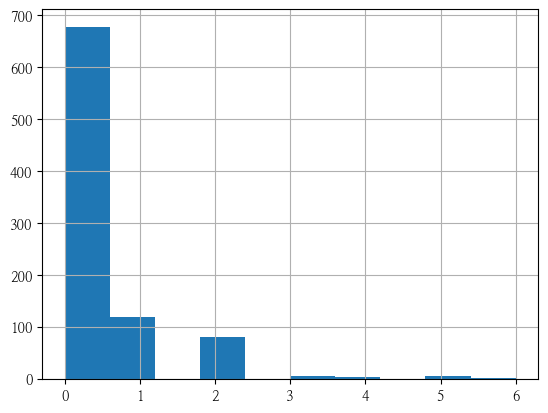

In [127]:
df_titanic["Parch"].hist()

+ 확인 결과 : 이상치는 없는 것으로 판단하였으며, __대부분 혼자 탑승했거나, 1명의 동반자와 함께 탑승하였다.__

## 그래프 분석을 통한 관계 확인

### 단일 변수분석

#### 선실 등급별 생존자 비교

<AxesSubplot:xlabel='Pclass'>

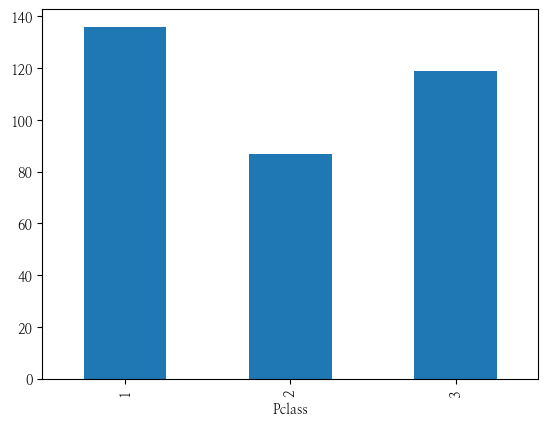

In [168]:
df_Pclass_survived = df_titanic[df_titanic["Survived"] == 1]
df_count_Pclass_survived = df_Pclass_survived.groupby(by=["Pclass"])["Survived"].count()
df_count_Pclass_survived.plot.bar()

#### 선실 등급별 사망자 비교

<AxesSubplot:xlabel='Pclass'>

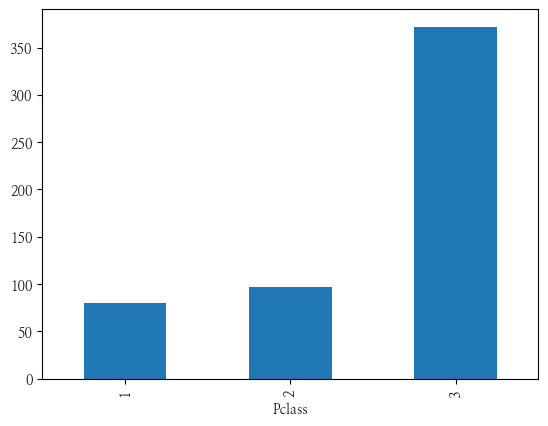

In [170]:
df_Pclass_survived = df_titanic[df_titanic["Survived"] == 0]
df_count_Pclass_survived = df_Pclass_survived.groupby(by=["Pclass"])["Survived"].count()
df_count_Pclass_survived.plot.bar()

+ 분석결과 
    + 생존자의 수는 차이가 적었다.
    + 사망자의 경우, **등급이 낮은 선실에 타고 있던 인원들의 사망 확률이 높다**는 것을 확인할 수 있었다.

#### 남녀 생존자 비교

<AxesSubplot:xlabel='Sex'>

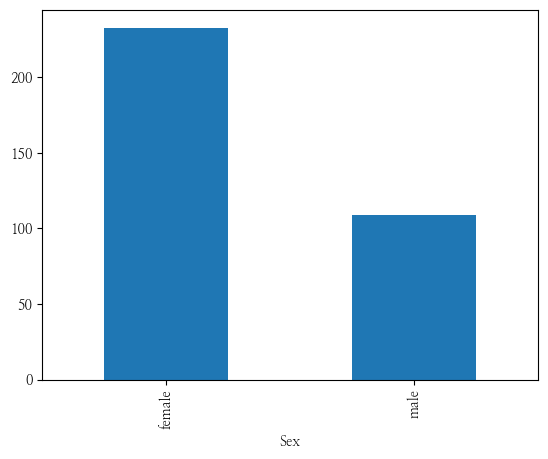

In [182]:
df_Sex_survived = df_titanic[df_titanic["Survived"] == 1]
df_count_Sex_survived = df_Sex_survived.groupby(by=["Sex"])["Survived"].count()
df_count_Sex_survived 
df_count_Sex_survived.plot.bar()

#### 남녀 사망자 비교

<AxesSubplot:xlabel='Sex'>

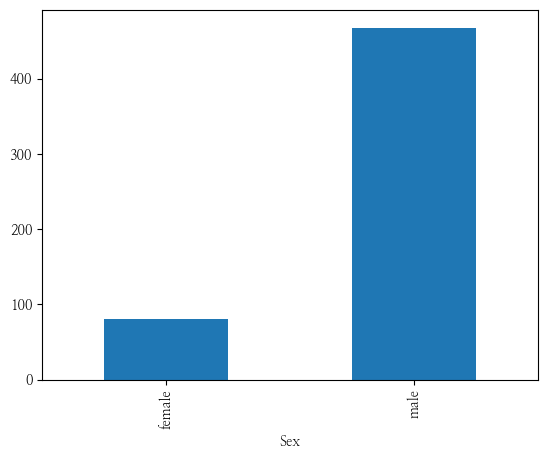

In [184]:
df_Sex_survived = df_titanic[df_titanic["Survived"] == 0]
df_count_Sex_survived = df_Sex_survived.groupby(by=["Sex"])["Survived"].count()
df_count_Sex_survived
df_count_Sex_survived.plot.bar()

+ 분석결과
    + 여성의 경우 생존률이 높았다.
    + 남성의 경우 사망률이 높았다.
    + **남성이 여성보다 생존확률이 낮음을 확인할 수 있었다.**

#### 연령별 생존자 비율

In [217]:
### 나이 분류
def age(x):
    if x < 20:
        return "10대~20대"
    elif x < 40:
        return "20대~30대"
    elif x < 60:
        return "40대~60대"
    else:
        return "60대 이상"
df_titanic["age"] = df_titanic["Age"].apply(age)

<AxesSubplot:>

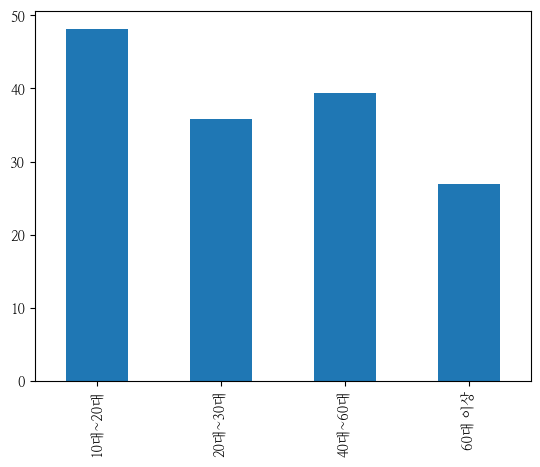

In [218]:
df_count_age_total = df_titanic["age"].value_counts()
df_age_survived = df_titanic[df_titanic["Survived"] == 1]
df_count_age_survived = df_age_survived.groupby(by=["age"])["Survived"].count()
df_count_age_survived = (df_count_age_survived / df_count_age_total)*100
df_count_age_survived.plot.bar()

#### 연령별 사망자 비율

<AxesSubplot:>

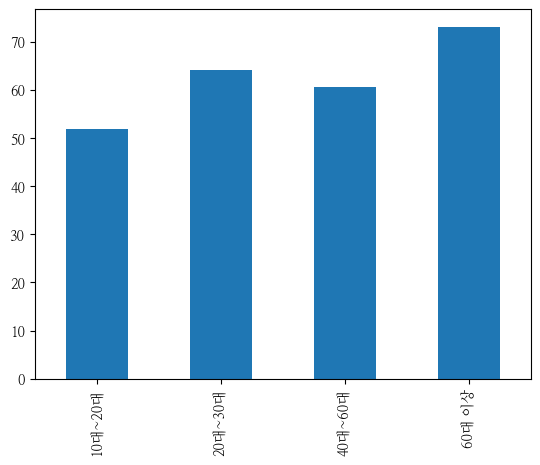

In [254]:
df_count_age_total = df_titanic["age"].value_counts()
df_age_survived = df_titanic[df_titanic["Survived"] == 0]
df_count_age_survived = df_age_survived.groupby(by=["age"])["Survived"].count()
df_count_age_survived = (df_count_age_survived / df_count_age_total)*100
df_count_age_survived.plot.bar()

+ 분석결과
    + 연령대가 증가함에 따라 생존률은 낮아지고 사망률은 증가하였다.
    + 하지만 뚜렸한 변화는 찾지 못했다.
    + **생존확률과 연령대는 큰 연관성은 보이지 않았다.**
        + 이는 전체적으로 사망자의 비율이 높기 때문이라고 판단하였다.

#### 형제 또는 배우자와 탑승 시 생존자 비율

<AxesSubplot:>

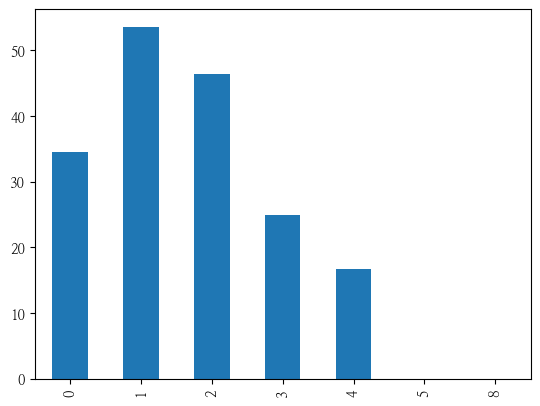

In [255]:
df_count_age_total = df_titanic["SibSp"].value_counts()
df_SibSp_survived = df_titanic[df_titanic["Survived"] == 1]
df_count_SibSp_survived = df_SibSp_survived.groupby(by=["SibSp"])["Survived"].count()
df_count_SibSp_survived = (df_count_SibSp_survived / df_count_age_total)*100
df_count_SibSp_survived.plot.bar()

<AxesSubplot:>

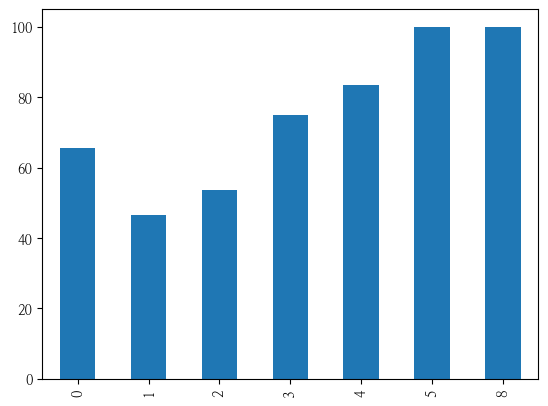

In [257]:
df_count_age_total = df_titanic["SibSp"].value_counts()
df_SibSp_survived = df_titanic[df_titanic["Survived"] == 0]
df_count_SibSp_survived = df_SibSp_survived.groupby(by=["SibSp"])["Survived"].count()
df_count_SibSp_survived = (df_count_SibSp_survived / df_count_age_total)*100
df_count_SibSp_survived.plot.bar()

+ 분석결과
    + 동반 인원이 증가할 수록 생존자 비율은 감소하고, 사망자 비율은 증가한다.
    + **형제 또는 배우자 동반 인원이 적을 수록 생존 확률이 증가**하는 것을 알 수 있다.

#### 자녀 또는 부모와 탑승 시 생존자 비율

<AxesSubplot:>

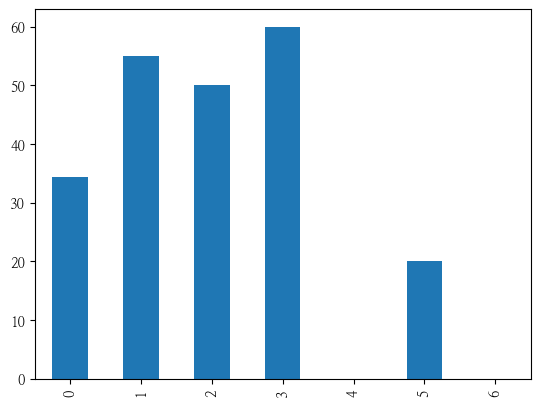

In [280]:
df_count_age_total = df_titanic["Parch"].value_counts()
df_Parch_survived = df_titanic[df_titanic["Survived"] == 1]
df_count_Parch_survived = df_Parch_survived.groupby(by=["Parch"])["Survived"].count()
df_count_Parch_survived = (df_count_Parch_survived / df_count_age_total)*100
df_count_Parch_survived.plot.bar()

#### 자녀 또는 부모와 탑승 시 사망자 비율

<AxesSubplot:>

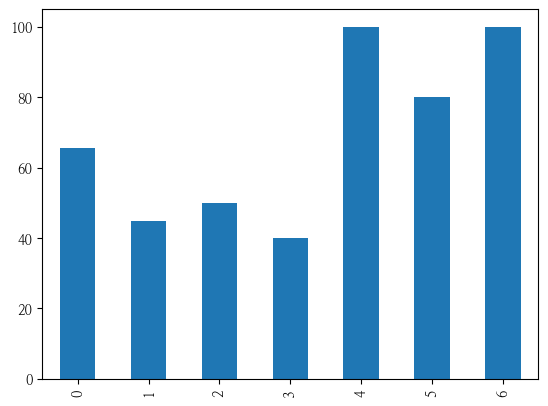

In [279]:
df_count_age_total = df_titanic["Parch"].value_counts()
df_Parch_survived = df_titanic[df_titanic["Survived"] == 0]
df_count_Parch_survived = df_Parch_survived.groupby(by=["Parch"])["Survived"].count()
df_count_Parch_survived = (df_count_Parch_survived / df_count_age_total)*100
df_count_Parch_survived.plot.bar()

+ 분석결과
    + 생존자 비율은 동반인원이 증가함에 따라 감소하는 경향을 보였다.
    + 사망자 비율은 동반인원이 증가함에 따라 증가하는 경향을 보였다.
    + **자녀 또는 부모 동반인원 증가에 따라 생존확률이 감소하지만, 큰 연관성은 없는 것**으로 판단하였다.

## 생존에 영향을 미치는 잠재 인자 도출

1. 등급이 높은 선실에 탑승한 경우 생존확률은 증가하였다.
2. 남녀 간 비교에서는 남성의 생존확률이 여성의 생존확률보다 낮았다.
3. 연령대별 생존확률은 나이가 증가할 수록 생존확률이 낮아졌지만, 전체적으로 사망자 비율이 높기 때문에 유의미한 변화 추이는 확인하지 못하였다.
4. 형제, 배우자와 동반한 경우, 동반인원이 증가할수록 생존확률이 감소하였다.
5. 자녀, 부모님과 동반한 경우, 동반인원이 증가할수록 생존확률이 감소하였지만, 유의미한 변화 추이는 확인하지 못하였다.

### 동반인원이 적거나,
### 높은 등급의 선실에 탑승하거나,
### 여성일 경우 생존확률이 증가한다.

# 실습과제 3 : 기술통계 - 파이썬 코딩 및 결과 정리_2

In [8]:
df_model = df_car[["model", "mpg"]]
# df_model.groupby('model').describe()

In [9]:
# 시내에서 연비 통계치 계산
df_model.groupby('model').describe().head()

mpg                                                     
            count       mean       std   min    25%   50%    75%   max
model                                                                 
4runner 4wd   6.0  15.166667  0.752773  14.0  15.00  15.0  15.75  16.0
a4            7.0  18.857143  1.864454  16.0  18.00  18.0  20.50  21.0
a4 quattro    8.0  17.125000  1.807722  15.0  15.75  17.0  18.25  20.0
a6 quattro    3.0  16.000000  1.000000  15.0  15.50  16.0  16.50  17.0
altima        6.0  20.666667  1.966384  19.0  19.00  20.0  22.50  23.0

In [10]:
# 고속도로에서 연비 계산
df_model_highway = df_car[["highway_mileage", "mpg"]]
df_model_highway.groupby("highway_mileage").describe().head()

mpg                                                   
                count       mean       std   min   25%   50%   75%   max
highway_mileage                                                         
12                5.0   9.000000  0.000000   9.0   9.0   9.0   9.0   9.0
14                2.0  11.000000  0.000000  11.0  11.0  11.0  11.0  11.0
15               10.0  11.000000  0.000000  11.0  11.0  11.0  11.0  11.0
16                7.0  11.857143  0.899735  11.0  11.0  12.0  12.5  13.0
17               31.0  13.161290  1.185939  11.0  13.0  13.0  14.0  15.0

## 연비 계산에 따른 비교 분석

# 실습과제 4 : 기술통계 - 파이썬 코딩 및 결과 정리_2

In [115]:
ds_Exh_QC1 = pd.read_csv("/home/piai/Bigdata 실습과제/1 Big Data 분석 기초/mycars.csv")
df = ds_Exh_QC1[['model',"automatic"]]

In [113]:
count_df = df['model'].value_counts().sort_index()
cumcnt_df = np.cumsum(count_df)
percent_df = count_df/sum(count_df)*100
cumpct_df = np.cumsum(percent_df)

In [114]:
count_data = pd.DataFrame({
    'Count' : count_df, 'CumCnt' : cumcnt_df, 'Percent' : percent_df, 'CumPct': cumpct_df})
count_data.head()

,Count,CumCnt,Percent,CumPct
4runner 4wd,6,6,2.564103,2.564103
a4,7,13,2.991453,5.555556
a4 quattro,8,21,3.418803,8.974359
a6 quattro,3,24,1.282051,10.256410
altima,6,30,2.564103,12.820513


# 실습과제 5 : 정규분포 1

In [77]:
mu = 175
sigma = 5
x = 180
prob = stats.norm.cdf(x, mu, sigma)
print("나의 키가 {0}cm일 때 나는 {1:.2f}% 범위에 위치한다.".format(x,prob*100))

나의 키가 180cm일 때 나는 84.13% 범위에 위치한다.


# 실습과제 6 : 정규분포 2

In [82]:
mu = 12
sigma = 3
x1 = 9
x2 = 15
prob1 = stats.norm.cdf(x1, mu, sigma)
prob2 = stats.norm.cdf(x2, mu, sigma)
# 1. 1리터를 가지고 9km이상 15km 이하를 달릴 확률?
print("1리터를 가지고 {0}km이상 {1}km 이하를 달릴 확률은 {2:.2f}% 이다.".format(x1,x2,(prob2-prob1)*100))
# 2. 1리터를 가지고 15km 이상을 달릴 확률?
print("1리터를 가지고 {0}km 이상을 달릴 확률은 {1:.2f}% 이다.".format(x2,(1-prob2)*100))

1리터를 가지고 9km이상 15km 이하를 달릴 확률은 68.27% 이다.
1리터를 가지고 15km 이상을 달릴 확률은 15.87% 이다.


# 실습과제 7 : t 분포

In [72]:
t = 2.0
df = 100
# 누적확률 계산
prob = stats.t.cdf(t,df)
print("P(T<F): {:.3f}".format(prob))

P(T<F): 0.976


# 실습과제 8 : 카이제곱

In [69]:
chisq = 3.0
df = 8
#누적 확률 계산
prob = stats.chi2.cdf(chisq, df)
print("P(X<={0}): {1:.4f}".format(chisq,prob))

P(X<=3.0): 0.0656


# 실습과제 9 : F 분포

In [87]:
f = 1.5
dfnum = 10
dfden = 100
# 누적 확률 계산
prob = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
print("P(X<=F): {0:.3f}".format(prob))

P(X<=F): 0.850


# 실습과제 10 : 이항분포

In [110]:
# 광택도 불량률
n = 5
p = 0.3
for i in range(n+1):
    # 이항 분포 계산
    prob = stats.binom.pmf(k = i, n = n, p = p)
    print("5대의 차량을 임의로 선택했을 때 불량 대수가 {0}대 나올 확률 : {1:.3f}".format(i,prob))

5대의 차량을 임의로 선택했을 때 불량 대수가 0대 나올 확률 : 0.168
5대의 차량을 임의로 선택했을 때 불량 대수가 1대 나올 확률 : 0.360
5대의 차량을 임의로 선택했을 때 불량 대수가 2대 나올 확률 : 0.309
5대의 차량을 임의로 선택했을 때 불량 대수가 3대 나올 확률 : 0.132
5대의 차량을 임의로 선택했을 때 불량 대수가 4대 나올 확률 : 0.028
5대의 차량을 임의로 선택했을 때 불량 대수가 5대 나올 확률 : 0.002
